In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


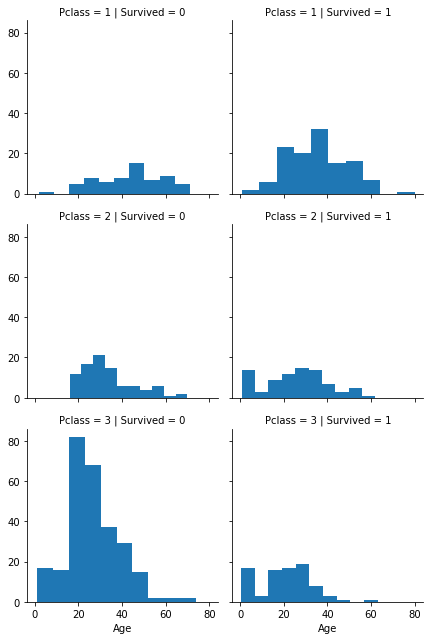

In [4]:
grid = sns.FacetGrid(train_df, col='Survived',row='Pclass')
grid.map(plt.hist,'Age')
grid.add_legend()

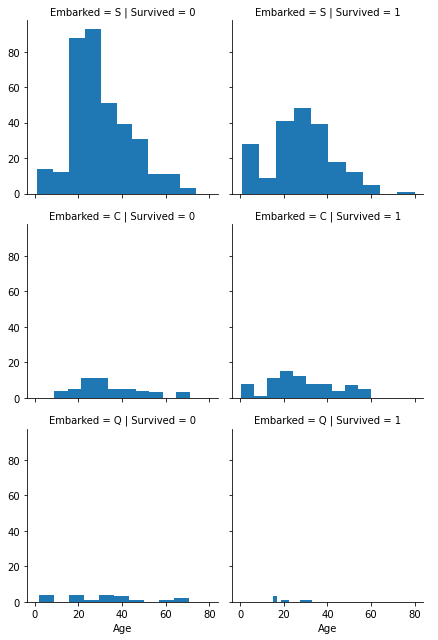

In [5]:
grid = sns.FacetGrid(train_df, col='Survived',row='Embarked')
grid.map(plt.hist,'Age')
grid.add_legend()

C:\Users\Jeremy\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


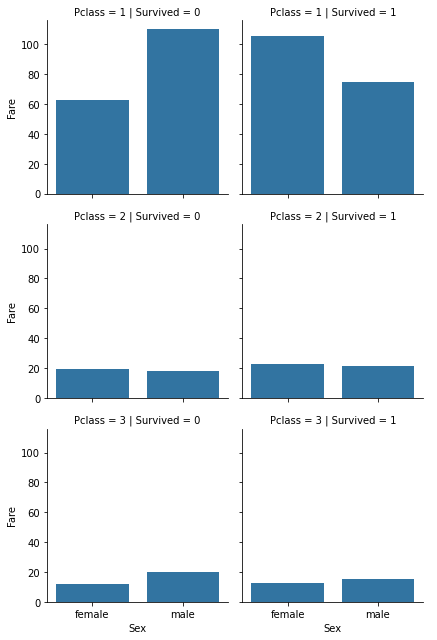

In [6]:
grid = sns.FacetGrid(train_df, col='Survived',row='Pclass')
grid.map(sns.barplot, 'Sex', 'Fare',ci=None)
grid.add_legend()

C:\Users\Jeremy\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


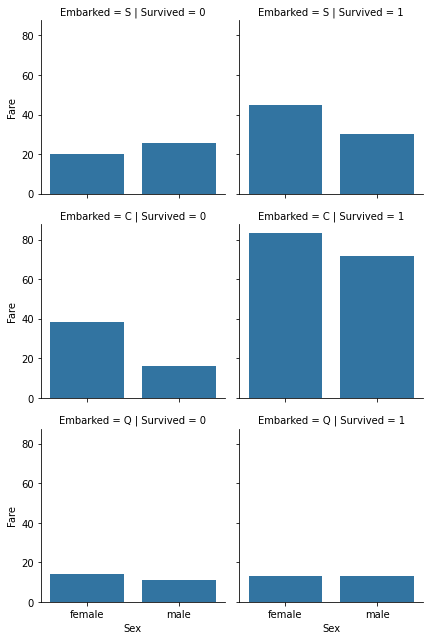

In [7]:
grid = sns.FacetGrid(train_df, col='Survived',row='Embarked')
grid.map(sns.barplot, 'Sex', 'Fare',ci=None)
grid.add_legend()

In [8]:
train_df = train_df.drop(['Cabin','Name','Ticket','PassengerId'],axis=1)
test_df = test_df.drop(['Ticket','Cabin','Name'],axis=1)
combine = [train_df, test_df]

In [9]:
for dataset in combine :
    dataset['Age'] = dataset.groupby(['Sex'], sort=False)['Age'].apply(lambda x:x.fillna(x.median())).astype(int)
train_df.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
886,0,2,male,27,0,0,13.00,S
887,1,1,female,19,0,0,30.00,S
888,0,3,female,27,1,2,23.45,S
889,1,1,male,26,0,0,30.00,C
890,0,3,male,32,0,0,7.75,Q


In [10]:
freq_port = train_df.Embarked.dropna().mode()[0]
for dataset in combine :
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    int32  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(1), int32(1), int64(4), object(2)
memory usage: 52.3+ KB


In [11]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(),inplace=True)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    int32  
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    object 
dtypes: float64(1), int32(1), int64(4), object(2)
memory usage: 24.6+ KB


In [12]:
train_df = pd.get_dummies(train_df)

In [13]:
test_df = pd.get_dummies(test_df)

In [14]:
train_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22,1,0,7.2500,0,1,0,0,1
1,1,1,38,1,0,71.2833,1,0,1,0,0
2,1,3,26,0,0,7.9250,1,0,0,0,1
3,1,1,35,1,0,53.1000,1,0,0,0,1
4,0,3,35,0,0,8.0500,0,1,0,0,1


In [15]:
test_df.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,34,0,0,7.8292,0,1,0,1,0
1,893,3,47,1,0,7.0000,1,0,0,0,1
2,894,2,62,0,0,9.6875,0,1,0,1,0
3,895,3,27,0,0,8.6625,0,1,0,0,1
4,896,3,22,1,1,12.2875,1,0,0,0,1


In [16]:
X_train = train_df.drop('Survived',axis=1)
y_train = train_df['Survived']
X_test = test_df.drop('PassengerId',axis=1).copy()

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
scaled_data = scaler.transform(X_train)
scaled_data = pd.DataFrame(scaled_data,columns=X_train.columns)
scaled_data

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.827377,-0.570302,0.432793,-0.473674,-0.502445,-0.737695,0.737695,-0.482043,-0.307562,0.615838
1,-1.566107,0.658572,0.432793,-0.473674,0.786845,1.355574,-1.355574,2.074505,-0.307562,-1.623803
2,0.827377,-0.263084,-0.474545,-0.473674,-0.488854,1.355574,-1.355574,-0.482043,-0.307562,0.615838
3,-1.566107,0.428158,0.432793,-0.473674,0.420730,1.355574,-1.355574,-0.482043,-0.307562,0.615838
4,0.827377,0.428158,-0.474545,-0.473674,-0.486337,-0.737695,0.737695,-0.482043,-0.307562,0.615838
...,...,...,...,...,...,...,...,...,...,...
886,-0.369365,-0.186279,-0.474545,-0.473674,-0.386671,-0.737695,0.737695,-0.482043,-0.307562,0.615838
887,-1.566107,-0.800716,-0.474545,-0.473674,-0.044381,1.355574,-1.355574,-0.482043,-0.307562,0.615838
888,0.827377,-0.186279,0.432793,2.008933,-0.176263,1.355574,-1.355574,-0.482043,-0.307562,0.615838
889,-1.566107,-0.263084,-0.474545,-0.473674,-0.044381,-0.737695,0.737695,2.074505,-0.307562,-1.623803


In [18]:
logreg = LogisticRegression()
logreg.fit(scaled_data,y_train)
X_test_scaled = scaler.transform(X_test)
y_pred = logreg.predict(X_test_scaled)
acc_log = round(logreg.score(scaled_data,y_train)*100,2)
acc_log

80.02

In [19]:
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)
X_test_scaled

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.827377,0.351353,-0.474545,-0.473674,-0.490783,-0.737695,0.737695,-0.482043,3.251373,-1.623803
1,0.827377,1.349813,0.432793,-0.473674,-0.507479,1.355574,-1.355574,-0.482043,-0.307562,0.615838
2,-0.369365,2.501883,-0.474545,-0.473674,-0.453367,-0.737695,0.737695,-0.482043,3.251373,-1.623803
3,0.827377,-0.186279,-0.474545,-0.473674,-0.474005,-0.737695,0.737695,-0.482043,-0.307562,0.615838
4,0.827377,-0.570302,0.432793,0.767630,-0.401017,1.355574,-1.355574,-0.482043,-0.307562,0.615838
...,...,...,...,...,...,...,...,...,...,...
413,0.827377,-0.186279,-0.474545,-0.473674,-0.486337,-0.737695,0.737695,-0.482043,-0.307562,0.615838
414,-1.566107,0.735376,-0.474545,-0.473674,1.544246,1.355574,-1.355574,2.074505,-0.307562,-1.623803
415,0.827377,0.658572,-0.474545,-0.473674,-0.502445,-0.737695,0.737695,-0.482043,-0.307562,0.615838
416,0.827377,-0.186279,-0.474545,-0.473674,-0.486337,-0.737695,0.737695,-0.482043,-0.307562,0.615838


In [20]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df['Correlation'] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation',ascending=False)

,Feature,Correlation
5,Sex_female,0.644268
4,Fare,0.102023
7,Embarked_C,0.078647
8,Embarked_Q,0.035784
3,Parch,-0.073028
9,Embarked_S,-0.091417
2,SibSp,-0.355194
1,Age,-0.505144
6,Sex_male,-0.644268
0,Pclass,-0.907396


In [21]:
svc = SVC()
svc.fit(scaled_data,y_train)
y_pred = svc.predict(X_test_scaled)
acc_svc = round(svc.score(scaled_data,y_train)*100,2)
acc_svc

84.29

In [22]:
dec = DecisionTreeClassifier()
dec.fit(scaled_data,y_train)
Y_pred = dec.predict(X_test_scaled)
acc_dec=round(dec.score(scaled_data,y_train)*100,2)
acc_dec

97.76

In [23]:
models_acc = pd.DataFrame({'Model' : ['Logistic Regression','Decision Trees','SVM Classification'], 'Score' : [acc_log,acc_dec,acc_svc]})
models_acc.sort_values(by='Score', ascending=False)

,Model,Score
1,Decision Trees,97.76
2,SVM Classification,84.29
0,Logistic Regression,80.02


In [24]:
prediction_dec = pd.DataFrame({'PassengerId' : test_df['PassengerId'],'Survived' : Y_pred})
prediction_dec

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [25]:
prediction_dec.to_csv('Homework5.csv',index=False)